# Foundations of Data Science
## Homework 3

Student Name: Allan Porter

Student Netid: ap5167
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `Cell2Cell_data.csv` (you can find this in the data folder).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [153]:
import numpy as np
import pandas as pd

np.random.seed(20)
df = pd.read_csv('Data/Cell2Cell_data.csv')
split = np.random.rand(df.shape[0])
train_df = df[split < .80]
test_df = df[split >= .80]
X_train = train_df.drop('churndep',axis=1)
y_train = train_df.loc[:,'churndep']
X_test = test_df.drop('churndep',axis=1)
y_test = test_df.loc[:,'churndep']

#(train.shape[0] / (train.shape[0] + test.shape[0])),(test.shape[0]/(train.shape[0]+test.shape[0]))


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

<p>
<div style="color:blue">
We could add a new column with labels to each of the train and test datasets and assign a 0 in the new column to all entries in the training set and 1 to all entries in the test set.   We can then recombine them into one dataframe which now indicates whether each entry is from the test or training set.  The data can be partitioned into training and tests a few times each with different parts of the original data being partitioned.  For each partition, we can then use a classifier to fit the training datasets and predict the target variable.   If we see that the predictive values aren't very skewed it shows that there is not too much selection bias and our selection was in fact random.
<br><br>
The probability of customers churning should be at around 50% (the overall frequency of customer churning in the total original dataset) for each of the partitioned datasets.  This would indicate that the data was in fact partitioned at random.   If there is a probability much higher or lower that shows that the partitioning of data was uneven between the training and test sets.    
</div>
</p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [154]:
#Place your code here
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train,y_train)

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

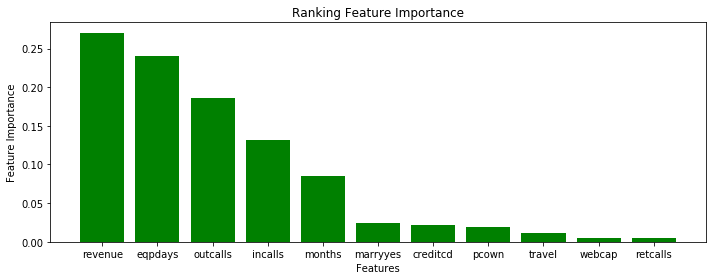

In [155]:
#Place your code here
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
feat_importances = clf.feature_importances_
#to_graph = [X_train.columns[arg] for arg in np.argsort(feat_importances)[::-1]]
df_added = pd.DataFrame(index=X_train.columns,columns=["importances"])
df_added.importances = feat_importances
df_added.sort_values(by='importances',ascending=False,inplace=True)
plt.bar(df_added.index, df_added.importances, color='green')
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Ranking Feature Importance")
plt.legend=True
plt.tight_layout()


5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [156]:
index = np.argsort(feat_importances)[::-1]
top_3 = [X_train.columns[i] for i in index[:3]]
X_train[top_3].corr()

,revenue,eqpdays,outcalls
revenue,1.000000,-0.226452,0.495140
eqpdays,-0.226452,1.000000,-0.246837
outcalls,0.495140,-0.246837,1.000000


<p>
<span style="color:blue">
    
<b>The relationship between the 3 most important features: </b>

Revenue and the number of days the customer had his/her current equipment are slight negatively correlated meaning that on average, the more days the customer had his/her equipment, the slightly less revenue he or she will bring in to the company. This slight correlation could make sense as if customers keep their own equipment for longer, they will be less likely to change and purchase new equipment from the company, which will in turn leave the company with less revenue.  That being the correlation is slight.  

The number of days that customers had their current equipment and the outgoing voice calls they made are positively correlated as more outgoing calls by the customer could indicate that the customer perhaps had interest or was already utilizing company services including the use of company equipment.  
<br>
The revenue brought in per customer and the outgoing voice calls the customers made are positively correlated as outgoing voice calls by the customer indicate that the customer perhaps had interest or was utilizing company services which subsequently led to increased revenue.  
<br>
<b>The relationship between each of the 3 most important features and churning: </b>

The revenue brought in by the customer and likelihood they churn have an extremely slight negative relationship meaning that customers who bring in more revenue are on average slightly less likely to churn. We could speculate that these customers are probably on average more committed to the services of the company as indicated by the amount they spend on company services. 

The amount of outgoing calls the customer makes and the likelihood they churn have a very slight negative relationship which means that customers who make more outgoing voice calls to the company are on average less likely to churn.  We could speculate that customers who make more outgoing calls to the company are either inquiring about or utilizing a higher amount of company services which means they are more committed or satisfied by the company and less likely to churn.   

The amount of days the customer has their current equipment and the likelihood that they churn have a mildly positive  relationship which means that customers who keep their current equipment for longer are on average more likely to churn.  We could speculate that customers who keep their current equipment for longer instead of buying equipment for the company are on average less committed or satisfied by the companys services and thereby more likely to churn.   


</span>
</p>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [157]:
#Place your code here
from sklearn.metrics import accuracy_score
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Training Set Accuracy:",accuracy_score(y_train, y_pred_train))
print("Testing Set Accuracy:",accuracy_score(y_test, y_pred_test))


Training Set Accuracy: 0.9997490825831948
Testing Set Accuracy: 0.5332246740220662


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [158]:
#min samples split refers to minimum number of samples required to split an internal node- def 2
#min samples leaf refers to minimum number of samples required to be at leaf node- def 1

min_samples_split = np.logspace(1,12,num=10,base=2).astype(int)
min_samples_leaf = np.logspace(1,12,num=10,base=2).astype(int)
#min_samples_split = np.arange(10,1000,100).astype(int)
# min_samples_leaf = np.logspace(.4,4,num=10).astype(int)
min_samples_split

array([   2,    4,   10,   25,   59,  138,  322,  752, 1755, 4096])

2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

<p>
<div style="color:black">
We see that our model in part 1 has a training accuracy of near 100, but only a test accuracy in the lower 50s. This indicates severe overiftting.   The minimum leaf size (which is by default 1) can be set to a higher number so that the decision tree stops splitting at a more upper level in the tree where the leaf size is larger and doesn't overspecify the data.  Additionally, the Minimum split size(minimum size of samples required to split an internal node) can also be set to a higher number so less of a sample size is required to split at internal nodes.   
<br>
    <br>
    Since trees grow at an expontential rate, I used a logarithmically spaced out number range for hyperparameters to account for the trees exponential growth.    For min_split_size, I stopped at 2^12, since I noticed that after that it overfits and the accuracy drops.  
</div>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

In [159]:
#Place your code here
accuracies = pd.DataFrame(columns=min_samples_leaf,index = min_samples_split)
from sklearn.tree import DecisionTreeClassifier
for i in range(len(min_samples_split)):
    for j in range(len(min_samples_leaf)):
        clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = min_samples_leaf[j], min_samples_split = min_samples_split[i])
        #print(min_samples_leaf[j],min_samples_split[i])
        clf = clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        #print("Accuracy:",accuracy_score(y_test, y_pred))
        #accuracies.append(accuracy_score(y_test, y_pred))
        accuracies.iloc[i,j] = accuracy_score(y_test, y_pred)
        #print(min_samples_leaf[j],min_samples_split[i], accuracy_score(y_test,y_pred))

        
#accuracies = np.log2(accuracies)
accuracies

,2,4,10,25,59,138,322,752,1755,4096
2,0.525953,0.525577,0.536108,0.563064,0.569835,0.582623,0.59002,0.585883,0.590647,0.580241
4,0.527332,0.526956,0.535732,0.562688,0.570461,0.582623,0.59002,0.585883,0.590647,0.580241
10,0.531344,0.526329,0.534855,0.563064,0.570461,0.582623,0.59002,0.585883,0.590647,0.580241
25,0.544509,0.535356,0.535983,0.562688,0.569835,0.582623,0.59002,0.585883,0.590647,0.580241
59,0.547141,0.541876,0.549524,0.564193,0.570461,0.582623,0.59002,0.585883,0.590647,0.580241
138,0.56344,0.565697,0.565446,0.571339,0.572718,0.582623,0.59002,0.585883,0.590647,0.580241
322,0.574223,0.574223,0.575727,0.58162,0.570838,0.581118,0.59002,0.585883,0.590647,0.580241
752,0.58676,0.586384,0.586384,0.587513,0.584127,0.586384,0.592277,0.585883,0.590647,0.580241
1755,0.593907,0.593907,0.593907,0.593656,0.596414,0.590898,0.594032,0.585883,0.590647,0.580241
4096,0.598044,0.598044,0.598044,0.598044,0.598044,0.591525,0.591525,0.593781,0.590647,0.580241


The highest accuracy for our classifier is 0.5980441323971916 and is obtained when the minimum split size is 4096 and the minimum leaf size is 2


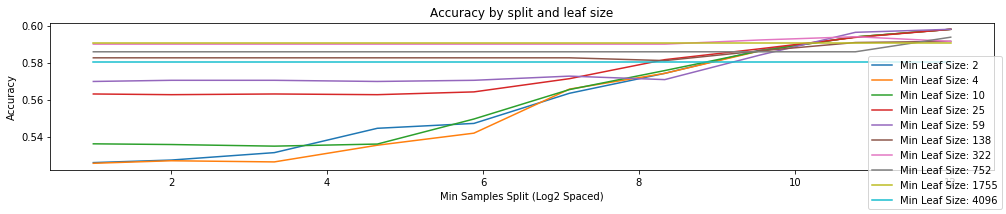

In [160]:
best = accuracies.values.max()
best_split = np.argmax(accuracies.values)
best_leaf = accuracies.stack().index[best_split]

print(f"The highest accuracy for our classifier is {best} and is obtained when the minimum split size is {best_leaf[0]} and the minimum leaf size is {best_leaf[1]}")
#accuracies
ax = plt.figure(figsize=(14,3))
plt.title("Accuracy by split and leaf size")
plt.xlabel("Min Samples Split (Log2 Spaced)")
plt.ylabel("Accuracy")
for i in range(len(min_samples_leaf)):
    plt.plot(np.log2(min_samples_split.astype(int)),(accuracies.iloc[:,i]),label="Min Leaf Size: {}".format(accuracies.columns[i]))
ax.legend(loc="lower right")
plt.tight_layout()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
The best accuracy of approximately 0.598 was garnered where the mimimum_leaf_size was 2 and the minimum_split_size was 4096.  The accuracy is the percentage of total times the decision tree classifier fit to the training set attempted to predict the test sets churndep value and predicted it correctly.
</span>
</p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<div style="color:blue">
Companies obviously place high value on churn rate as the more clients/customers they keep, the more revenue they will have a chance of making from each.  After all, for a company to increase their clientele their growth rate must exceed their churn rate.
    <br><br>
The churn model created above is important as it could predict which customers are likely to churn and stop using their services.  If the company had a way to accurately predict which customers will churn, they can advertise more to those customers and make more of an effort to maintain customers who are predicted to churn.  They could also logically deduce why such customers are churning and intervene to fix those problems based on the variables that contribute to churn.  Customers who are at high risk of churning as calculated by the model may be offered promotions for certain services at a higher rate than other customers to stop them from taking their business elsewhere.  The company could also try and reach out to them to see if they require any customer support. 
    
    
 </div>
</p>

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file `cases.csv` is available in the data folder.



1\. Load the cases data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [150]:
#Place your code here
#import date_tools
df = pd.read_csv('data/cases.csv')
new_yr = []
for yr in df.YEAR:
    yr = str(yr)
    yr = pd.to_datetime(yr)
    new_yr.append(yr)
df['YEAR'] = new_yr
df.index = df['YEAR']
df.drop(columns=["YEAR"])

,YFCASES
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
1705-01-01,58.0
1706-01-01,29.0
1707-01-01,20.0
1708-01-01,10.0


2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

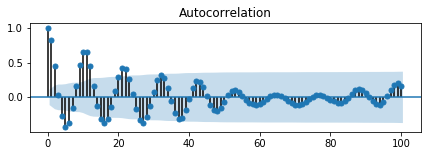

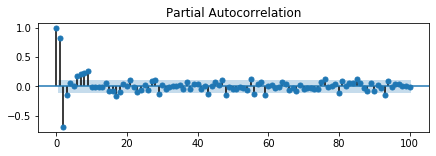

In [151]:
#Place your code here
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 7, 2
acf_plot = plot_acf(df.YFCASES,lags=100)
pacf_plot = plot_pacf(df.YFCASES,lags=100)

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


<p>
<span style="color:blue">


We see from the partial autocorrelation that the time series exhibits a sine wave shape pattern and shows major differentiations from 0 only at lags 1 and 2 (lag 1 shows a sharp positive spike, while lag 2 shows a sharp negative spike ) and not at the other correlations.   This follows rule 2 above and shows that 2 autoregressive parameters should be used to account for the 2 sharp differentiations in the first 2 lags.  This puts the autoregressive parameter p at 2. Q the Moving average parameter is set to 0.

</span>
</p>

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [152]:
#Place your code here
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import durbin_watson
#Get the autocorrelation of the residuals using ordinary least squares regression and dw statistic

# Going back for a moment, lets try the durbin watson approach before ARMA modeling with the correct params. 
# This will show if by default (before correct modeling) the errors are uncorrelated
from statsmodels.tsa.arima_model import ARMA
#ar = (ARMA(df['YFCASES'], (0,0)).fit(disp=False))
#durbin_watson(ar.resid.values)
durbin_watson(df.YFCASES)

0.13952892659903304

This value of approximately .13953 shows that the correlation is strong (since it is far from 2 which would indicate no correlation)
and that yellow fever cases in the past would be highly correlated with yellow fever cases in the future.
This is consistent with what we saw in our plot

5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


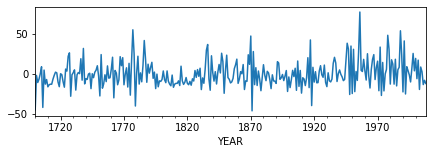

In [145]:
#Place your code here

from statsmodels.tsa.arima_model import ARMA
mod = ARMA(df.YFCASES, order=(2,0))
res = mod.fit()
#plot = res.plot_predict(start=200, end=360)
plot = res.resid.plot()
#The new model shows that sine wave predictions are gone, indicating that the serial dependency will have been dealt with 

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



NormaltestResult(statistic=41.7360189161114, pvalue=8.652440949981364e-10)

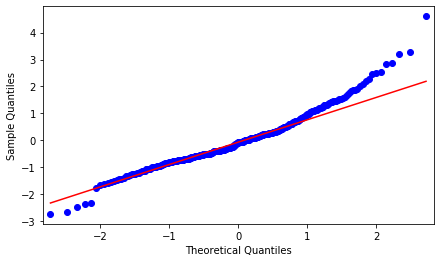

In [146]:
#Place your code here
import statsmodels as sm
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111)
fig = qqplot(res.resid, line='q', ax=ax, fit=True)
#Test to see if the data belongs to a normal distribution
stats.normaltest(res.resid)


<p>
<span style="color:blue">
The P Value is very low indicating that the data doesnt follow a normal distribution.  The qqplot shows that the errors and normal distribution line up for quantiles between -2 and 1 but veer apart beyond those values. 
</span>
</p>


7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


,r(autocorr),q,p
1,-0.085220,2.265960,0.132244
2,0.103692,5.631595,0.059857
3,-0.027833,5.874879,0.117859
4,0.091123,8.491075,0.075158
5,0.019010,8.605308,0.125881
6,0.031321,8.916433,0.178333
7,0.044485,9.546129,0.215785
8,-0.034337,9.922560,0.270503
9,0.185690,20.967738,0.012794
10,0.191608,32.767501,0.000298


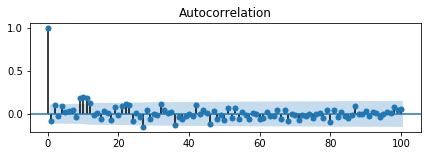

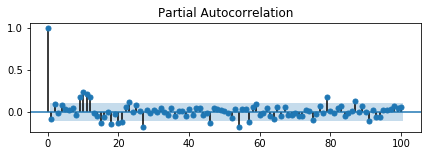

In [147]:
import statsmodels.api as sm
acf_plot = plot_acf(res.resid.values,lags=100)
pacf_plot = plot_pacf(res.resid.values,lags=100)

r,q,p=sm.tsa.acf(res.resid.values, qstat=True)
table = pd.DataFrame(index = np.arange(1,41), columns=["r(autocorr)","q","p"])
table["r(autocorr)"] = r[1:]
table["q"] = q
table["p"] = p
#print(f"P Values: {p} \n R Values: {r} \n Q Values: {q}")
table


<p>
<span style="color:blue">
The autocorrelation graph is now a lot more on par with the partial autocorrelation graph and the spikes have been smoothened indicating that serial dependency has been removed by specifying the correct autoregressive parameters p and q in the ARMA model.  The autocorrelations are now smoothened and closer to you as the autocorrelations of the errors have been dealth with.   The p values dropping to near 0 after lag 8 also shows autocorrelations a lot closer to 0 indicating independent distribution.
</span>
</p>

8\. Compute prediction for years 2009-2012 and analyze their fit against actual values. (1 point)

In [148]:
predictions = res.predict(start = '2009', end = '2012', dynamic = True)
predictions




2009-01-01    13.662915
2010-01-01    31.797851
2011-01-01    49.606269
2012-01-01    61.884453
Freq: AS-JAN, dtype: float64

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [149]:
#pred = res.predict(res.nobs-309,res.nobs-1)
pred = res.predict(df.YEAR[0],df.YEAR[-1],dynamic=True)
yfcases = df.YFCASES[0:]
#get the mean differences between the predictions and actual
forecast_err = yfcases.sub(pred).mean()
#get the avg of the absolute values of the mean differences over the predictions
abs_err = np.mean((np.abs(yfcases.sub(pred).mean()) / pred))
print(f"Forecast Error: {forecast_err}, Absolute Error: {abs_err}")


Forecast Error: 17.589856412826133, Absolute Error: 0.36525486953001834
